## Problem Statement
The lending industry faces significant challenges in assessing creditworthiness, particularly for applicants with limited or no credit history. Loan defaults pose financial risks to lending institutions, making accurate risk assessment crucial. Our primary objective is to use EDA and machine learning techniques to understand the drivers behind loan default and develop strategies to mitigate these risks effectively.

## Importing Necessary Libraries

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("C:/Users/Gayathri/OneDrive/Desktop/fair final/application_data.csv")

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [7]:
df.shape

(307511, 122)

In [8]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [11]:
df.isnull().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [12]:
null_val = df.isnull().sum()/df.shape[0]*100
null_val.head(50)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [13]:
null_val.tail(60)

COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58.515956
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BUILD_MEDI                66.497784
COMMONAREA_MEDI                 69.872297
ELEVATORS_MEDI                  53.295980
ENTRANCES_MEDI                  50.348768
FLOORSMAX_MEDI                  49.760822
FLOORSMIN_MEDI                  67.848630
LANDAREA_MEDI                   59.376738
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAREA_MEDI                 50.193326
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAREA_MEDI              55

In [14]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
columns_with_missing_values = missing_percentage[missing_percentage >= 50].index.tolist()
columns_with_missing_values

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [15]:
len(columns_with_missing_values)

41

**Droping Columns Which have Null Values Greater than or Equals to 50%**

In [16]:
df1 = df.drop(columns=columns_with_missing_values, axis=1)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df1.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,NaN,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,0.218859,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.514163,0.661024,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [18]:
null_val_1 = df1.isnull().sum()/df.shape[0]*100
null_val_1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [19]:
null_val_1.head(41)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [20]:
null_val_1.tail(40)

EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
FLAG_DOCUMENT_2                  0.000000
FLAG_DOCUMENT_3                  0.000000
FLAG_DOCUMENT_4                  0.000000
FLAG_DOCUMENT_5                  0.000000
FLAG_DOCUMENT_6                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_11                 0

**Droping Columns Which have Null Values Between 47 to 49%**

In [21]:
columns_to_drop=['YEARS_BEGINEXPLUATATION_AVG',
                'FLOORSMAX_AVG',
                'YEARS_BEGINEXPLUATATION_MODE',
                'FLOORSMAX_MODE',
                'YEARS_BEGINEXPLUATATION_MEDI',
                'FLOORSMAX_MEDI',
                'TOTALAREA_MODE',
                'EMERGENCYSTATE_MODE'
]
df2 = df1.drop(columns=columns_to_drop, axis=1)
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df2.shape

(307511, 73)

In [23]:
null_val_2 = df2.isnull().sum()/df.shape[0]*100
null_val_2.head(37)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [24]:
null_val_2.tail(36)

REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000


**Dropping Some Columns Which Are Not Relevant As Of My Knowledge**

In [25]:
columns_to_drop = [
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]
df3 = df2.drop(columns=columns_to_drop, axis=1)
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,Religion


In [26]:
df3.shape

(307511, 34)

In [27]:
null_val_3 = df3.isnull().sum()/df.shape[0]*100
null_val_3.head(17)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.003902
AMT_GOODS_PRICE               0.090403
NAME_TYPE_SUITE               0.420148
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
dtype: float64

In [28]:
null_val_3.tail(17)

DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
ORGANIZATION_TYPE               0.000000
dtype: float64

In [29]:
columna_to_drop = [
    "SK_ID_CURR",
    "REGION_RATING_CLIENT_W_CITY",
    "WEEKDAY_APPR_PROCESS_START",
    "HOUR_APPR_PROCESS_START",
    "CNT_FAM_MEMBERS",
    "FLAG_EMAIL",
    "FLAG_WORK_PHONE",
    "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH",
    "AMT_GOODS_PRICE"
]
df4 = df3.drop(columns=columna_to_drop, axis=1)
df4.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,1,1,1,0,Laborers,2,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,1,1,1,0,Core staff,2,Religion


# **Important Fearures**

1. **TARGET**: This is your target variable, indicating whether the client had payment difficulties. It's crucial for modeling the risk of default.

2. **NAME_CONTRACT_TYPE**: Different types of contracts may have different risk profiles. For example, revolving loans may carry higher risk compared to cash loans.

3. **CODE_GENDER**: Gender can potentially be correlated with financial behavior and risk.

4. **FLAG_OWN_CAR** and **FLAG_OWN_REALTY**: Ownership of assets like cars and real estate can provide insights into the client's financial stability and capacity to repay loans.

5. **CNT_CHILDREN**: The number of dependents may affect the client's ability to meet financial obligations.

6. **AMT_INCOME_TOTAL**: Income level is a crucial factor in assessing the client's ability to repay loans.

7. **AMT_CREDIT**: The credit amount of the loan indeed represents the amount of money that the lender gives to the borrower at the start of the loan term.

8.  **AMT_ANNUITY**: The loan annuity represents the total monthly payment that the borrower needs to make to the lender to satisfy their loan obligations

9. **NAME_TYPE_SUITE**: The presence of a co-borrower or guarantor may affect the client's financial stability.

10. **NAME_INCOME_TYPE**: These provide insights into the client's source of income and occupation, which can influence repayment capacity.

11. **DAYS_BIRTH** and **DAYS_EMPLOYED**: Age and employment duration can impact financial stability and repayment capacity.

12. **FLAG_MOBIL** and **FLAG_CONT_MOBILE**: Mobile phone accessibility can indicate the client's connectivity and possibly their reliability.

13. **REGION_RATING_CLIENT**: The rating of the region where the client lives may reflect the overall economic conditions and potential risk factors.

14. **ORGANIZATION_TYPE**: The type of organization where the client works can provide insights into their employment stability and income source.

15. **DAYS_LAST_PHONE_CHANGE**: Recent changes in phone numbers may indicate instability or changes in the client's circumstances.

16. **FLAG_EMP_PHONE**, **FLAG_PHONE**: These flags indicate whether the client provided contact information. Having valid contact information can be crucial for communication regarding loan terms and payments.

17. **NAME_EDUCATION_TYPE**: The level of education attained by the client can correlate with their earning potential and financial responsibility.

18. **NAME_FAMILY_STATUS**: Family status can provide insights into the client's financial stability and support network.

19. **NAME_HOUSING_TYPE**: Housing situation may indicate stability and financial responsibility.

20. **REGION_POPULATION_RELATIVE**: The normalized population of the region where the client lives can provide insights into the local economic conditions and potential risk factors.

21. **OCCUPATION_TYPE:** This feature indicates the type of occupation the client has. Different occupations come with varying levels of income stability and risk

In [30]:
df_cleaned = df4.copy()

In [31]:
df_cleaned.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,1,1,1,0,Laborers,2,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,1,1,1,0,Core staff,2,Religion


In [32]:
df_cleaned.tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,1,1,1,0,Sales staff,1,Services
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,1,0,1,1,NaN,2,XNA
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,1,1,1,0,Managers,3,School
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,1,1,1,0,Laborers,2,Business Entity Type 1
307510,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,1,1,1,1,Laborers,1,Business Entity Type 3


In [33]:
df_cleaned.shape

(307511, 24)

In [34]:
df_cleaned.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE'],
      dtype='object')

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   NAME_TYPE_SUITE             306219 non-null  object 
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

## Treating Null and Duplicate Values

In [36]:
df_cleaned.duplicated().sum()

15

In [37]:
df_cleaned.drop_duplicates(inplace=True)

In [38]:
df_cleaned.duplicated().sum()

0

In [39]:
df_cleaned.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
OCCUPATION_TYPE               96382
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
dtype: int64

In [40]:
df_cleaned.shape

(307496, 24)

In [41]:
df_cleaned.dropna(inplace=True)

In [42]:
df_cleaned.shape

(210195, 24)

## Statistical Information

In [43]:
df_cleaned.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT
count,210195.000000,210195.000000,2.101950e+05,2.101950e+05,210195.000000,210195.000000,210195.000000,210195.000000,210195.0,210195.000000,210195.000000,210195.000000,210195.000000
mean,0.087985,0.502943,1.757590e+05,6.099828e+05,27806.446628,0.020703,-14766.901572,-2378.867723,1.0,0.999957,0.997850,0.275734,2.049735
std,0.283274,0.764422,2.756405e+05,4.051350e+05,14616.875182,0.013653,3643.645725,2334.916616,0.0,0.006543,0.046322,0.446885,0.509097
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,-25200.000000,-17912.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.779695e+05,17091.000000,0.010006,-17544.000000,-3166.000000,1.0,1.000000,1.000000,0.000000,2.000000
50%,0.000000,0.000000,1.575000e+05,5.212800e+05,25848.000000,0.018850,-14580.000000,-1642.000000,1.0,1.000000,1.000000,0.000000,2.000000
75%,0.000000,1.000000,2.115000e+05,8.248230e+05,35613.000000,0.028663,-11793.000000,-767.000000,1.0,1.000000,1.000000,1.000000,2.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,0.000000,1.0,1.000000,1.000000,1.000000,3.000000


In [44]:
df_cleaned.corr(numeric_only=True)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT
TARGET,1.000000,0.008120,-0.005283,-0.040708,-0.019424,-0.039684,0.066396,0.076544,NaN,-0.000534,0.000641,-0.024820,0.064105
CNT_CHILDREN,0.008120,1.000000,-0.003606,-0.018411,-0.006615,-0.029610,0.238870,0.062002,NaN,0.000501,0.003135,-0.029630,0.036996
AMT_INCOME_TOTAL,-0.005283,-0.003606,1.000000,0.133512,0.162564,0.064075,-0.022777,-0.013351,NaN,-0.002617,-0.007457,0.002121,-0.073860
AMT_CREDIT,-0.040708,-0.018411,0.133512,1.000000,0.760739,0.099162,-0.162572,-0.095829,NaN,-0.004441,0.026520,0.030937,-0.102441
AMT_ANNUITY,-0.019424,-0.006615,0.162564,0.760739,1.000000,0.114847,-0.098990,-0.058049,NaN,-0.004839,0.027181,0.011510,-0.124717
REGION_POPULATION_RELATIVE,-0.039684,-0.029610,0.064075,0.099162,0.114847,1.000000,-0.047514,0.001906,NaN,-0.000462,-0.014362,0.084672,-0.527524
DAYS_BIRTH,0.066396,0.238870,-0.022777,-0.162572,-0.098990,-0.047514,1.000000,0.348791,NaN,0.000370,-0.009333,-0.044388,0.045208
DAYS_EMPLOYED,0.076544,0.062002,-0.013351,-0.095829,-0.058049,0.001906,0.348791,1.000000,NaN,0.003626,-0.004040,-0.059039,-0.008885
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMP_PHONE,-0.000534,0.000501,-0.002617,-0.004441,-0.004839,-0.000462,0.000370,0.003626,NaN,1.000000,-0.000304,-0.005724,0.002067


In [45]:
df_cleaned.cov(numeric_only=True)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT
TARGET,8.024399e-02,0.001758,-4.125084e+02,-4.671855e+03,-8.042779e+01,-1.534728e-04,6.853033e+01,5.062763e+01,0.0,-9.902057e-07,8.417009e-06,-0.003142,0.009245
CNT_CHILDREN,1.758287e-03,0.584341,-7.599032e+02,-5.701805e+03,-7.391103e+01,-3.090185e-04,6.653191e+02,1.106641e+02,0.0,2.504746e-06,1.109928e-04,-0.010122,0.014397
AMT_INCOME_TOTAL,-4.125084e+02,-759.903153,7.597767e+10,1.490948e+10,6.549711e+08,2.411284e+02,-2.287529e+07,-8.592625e+06,0.0,-4.720254e+00,-9.521957e+01,261.239551,-10364.656354
AMT_CREDIT,-4.671855e+03,-5701.804821,1.490948e+10,1.641344e+11,4.504950e+09,5.484774e+02,-2.399830e+08,-9.065017e+07,0.0,-1.177198e+01,4.976887e+02,5601.094526,-21128.750872
AMT_ANNUITY,-8.042779e+01,-73.911026,6.549711e+08,4.504950e+09,2.136530e+08,2.291868e+01,-5.272098e+06,-1.981170e+06,0.0,-4.627748e-01,1.840411e+01,75.183827,-928.072562
REGION_POPULATION_RELATIVE,-1.534728e-04,-0.000309,2.411284e+02,5.484774e+02,2.291868e+01,1.863920e-04,-2.363561e+00,6.075211e-02,0.0,-4.131059e-08,-9.082965e-06,0.000517,-0.003667
DAYS_BIRTH,6.853033e+01,665.319127,-2.287529e+07,-2.399830e+08,-5.272098e+06,-2.363561e+00,1.327615e+07,2.967378e+06,0.0,8.810365e-03,-1.575176e+00,-72.276429,83.859654
DAYS_EMPLOYED,5.062763e+01,110.664111,-8.592625e+06,-9.065017e+07,-1.981170e+06,6.075211e-02,2.967378e+06,5.451836e+06,0.0,5.539259e-02,-4.369164e-01,-61.603773,-10.561281
FLAG_MOBIL,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
FLAG_EMP_PHONE,-9.902057e-07,0.000003,-4.720254e+00,-1.177198e+01,-4.627748e-01,-4.131059e-08,8.810365e-03,5.539259e-02,0.0,4.281575e-05,-9.207426e-08,-0.000017,0.000007


## Detecting and Treating The Outlier

In [46]:
df_cleaned.skew(numeric_only=True)

TARGET                          2.908981
CNT_CHILDREN                    1.694353
AMT_INCOME_TOTAL              362.732721
AMT_CREDIT                      1.215362
AMT_ANNUITY                     1.557413
REGION_POPULATION_RELATIVE      1.439745
DAYS_BIRTH                     -0.202004
DAYS_EMPLOYED                  -1.971666
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE               -152.814703
FLAG_CONT_MOBILE              -21.495161
FLAG_PHONE                      1.003694
REGION_RATING_CLIENT            0.082922
dtype: float64

In [47]:
df_cleaned.skew(numeric_only=True).index

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'REGION_RATING_CLIENT'],
      dtype='object')

In [48]:
import seaborn as sns
sns.set(style="darkgrid")

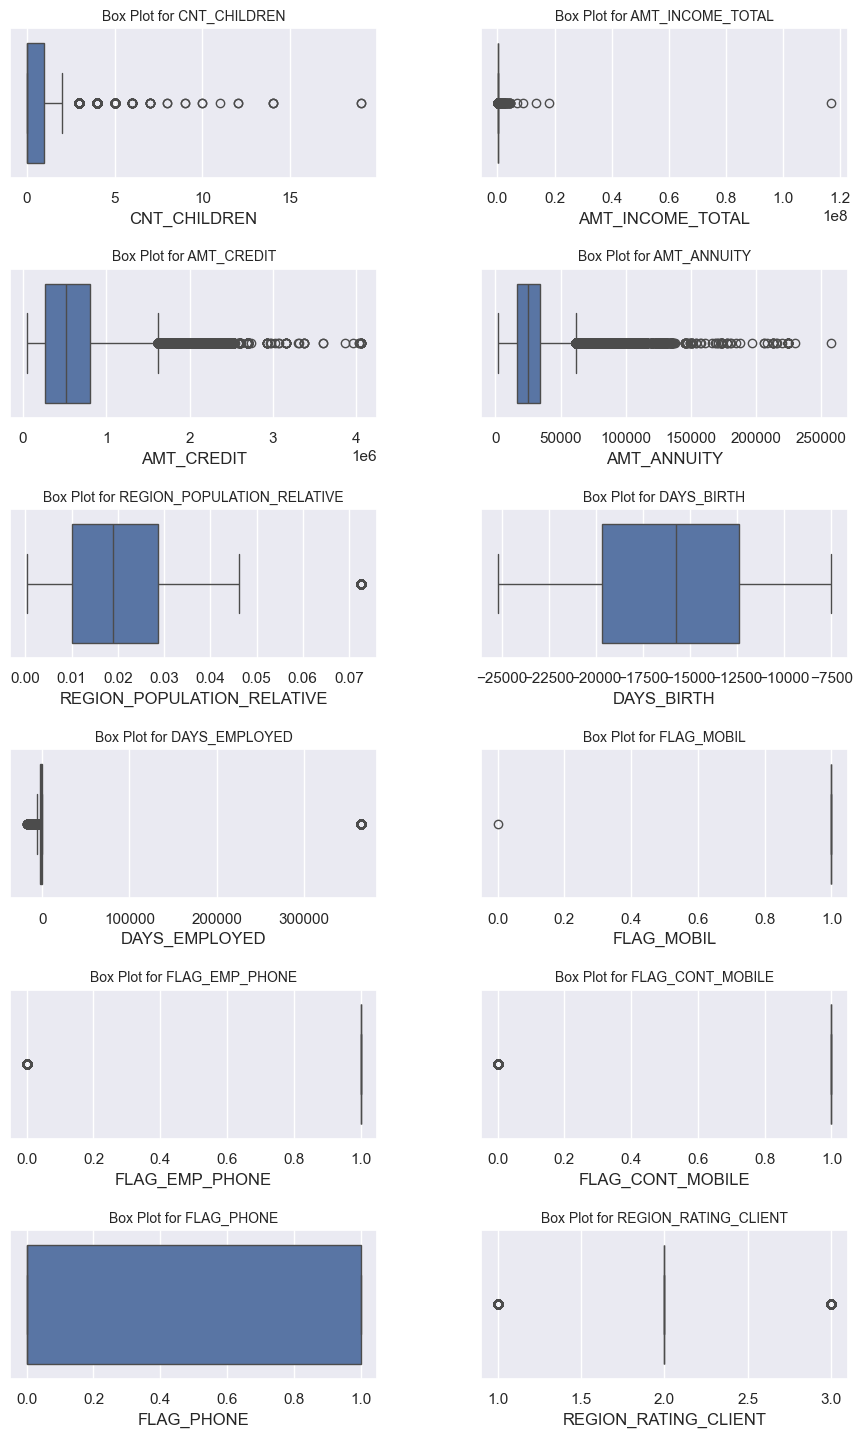

In [49]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(10,15)
plt.tight_layout(pad=3.50)

axes = axes.flatten()

columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'REGION_RATING_CLIENT']

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}', fontsize=10)

# Adjust the plot numbers
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.show()

**Here We Can not Treat The Outliers Because They Are Have Particular Persons Information So We should not remove in this case**

## Checking Correlation Using Plots

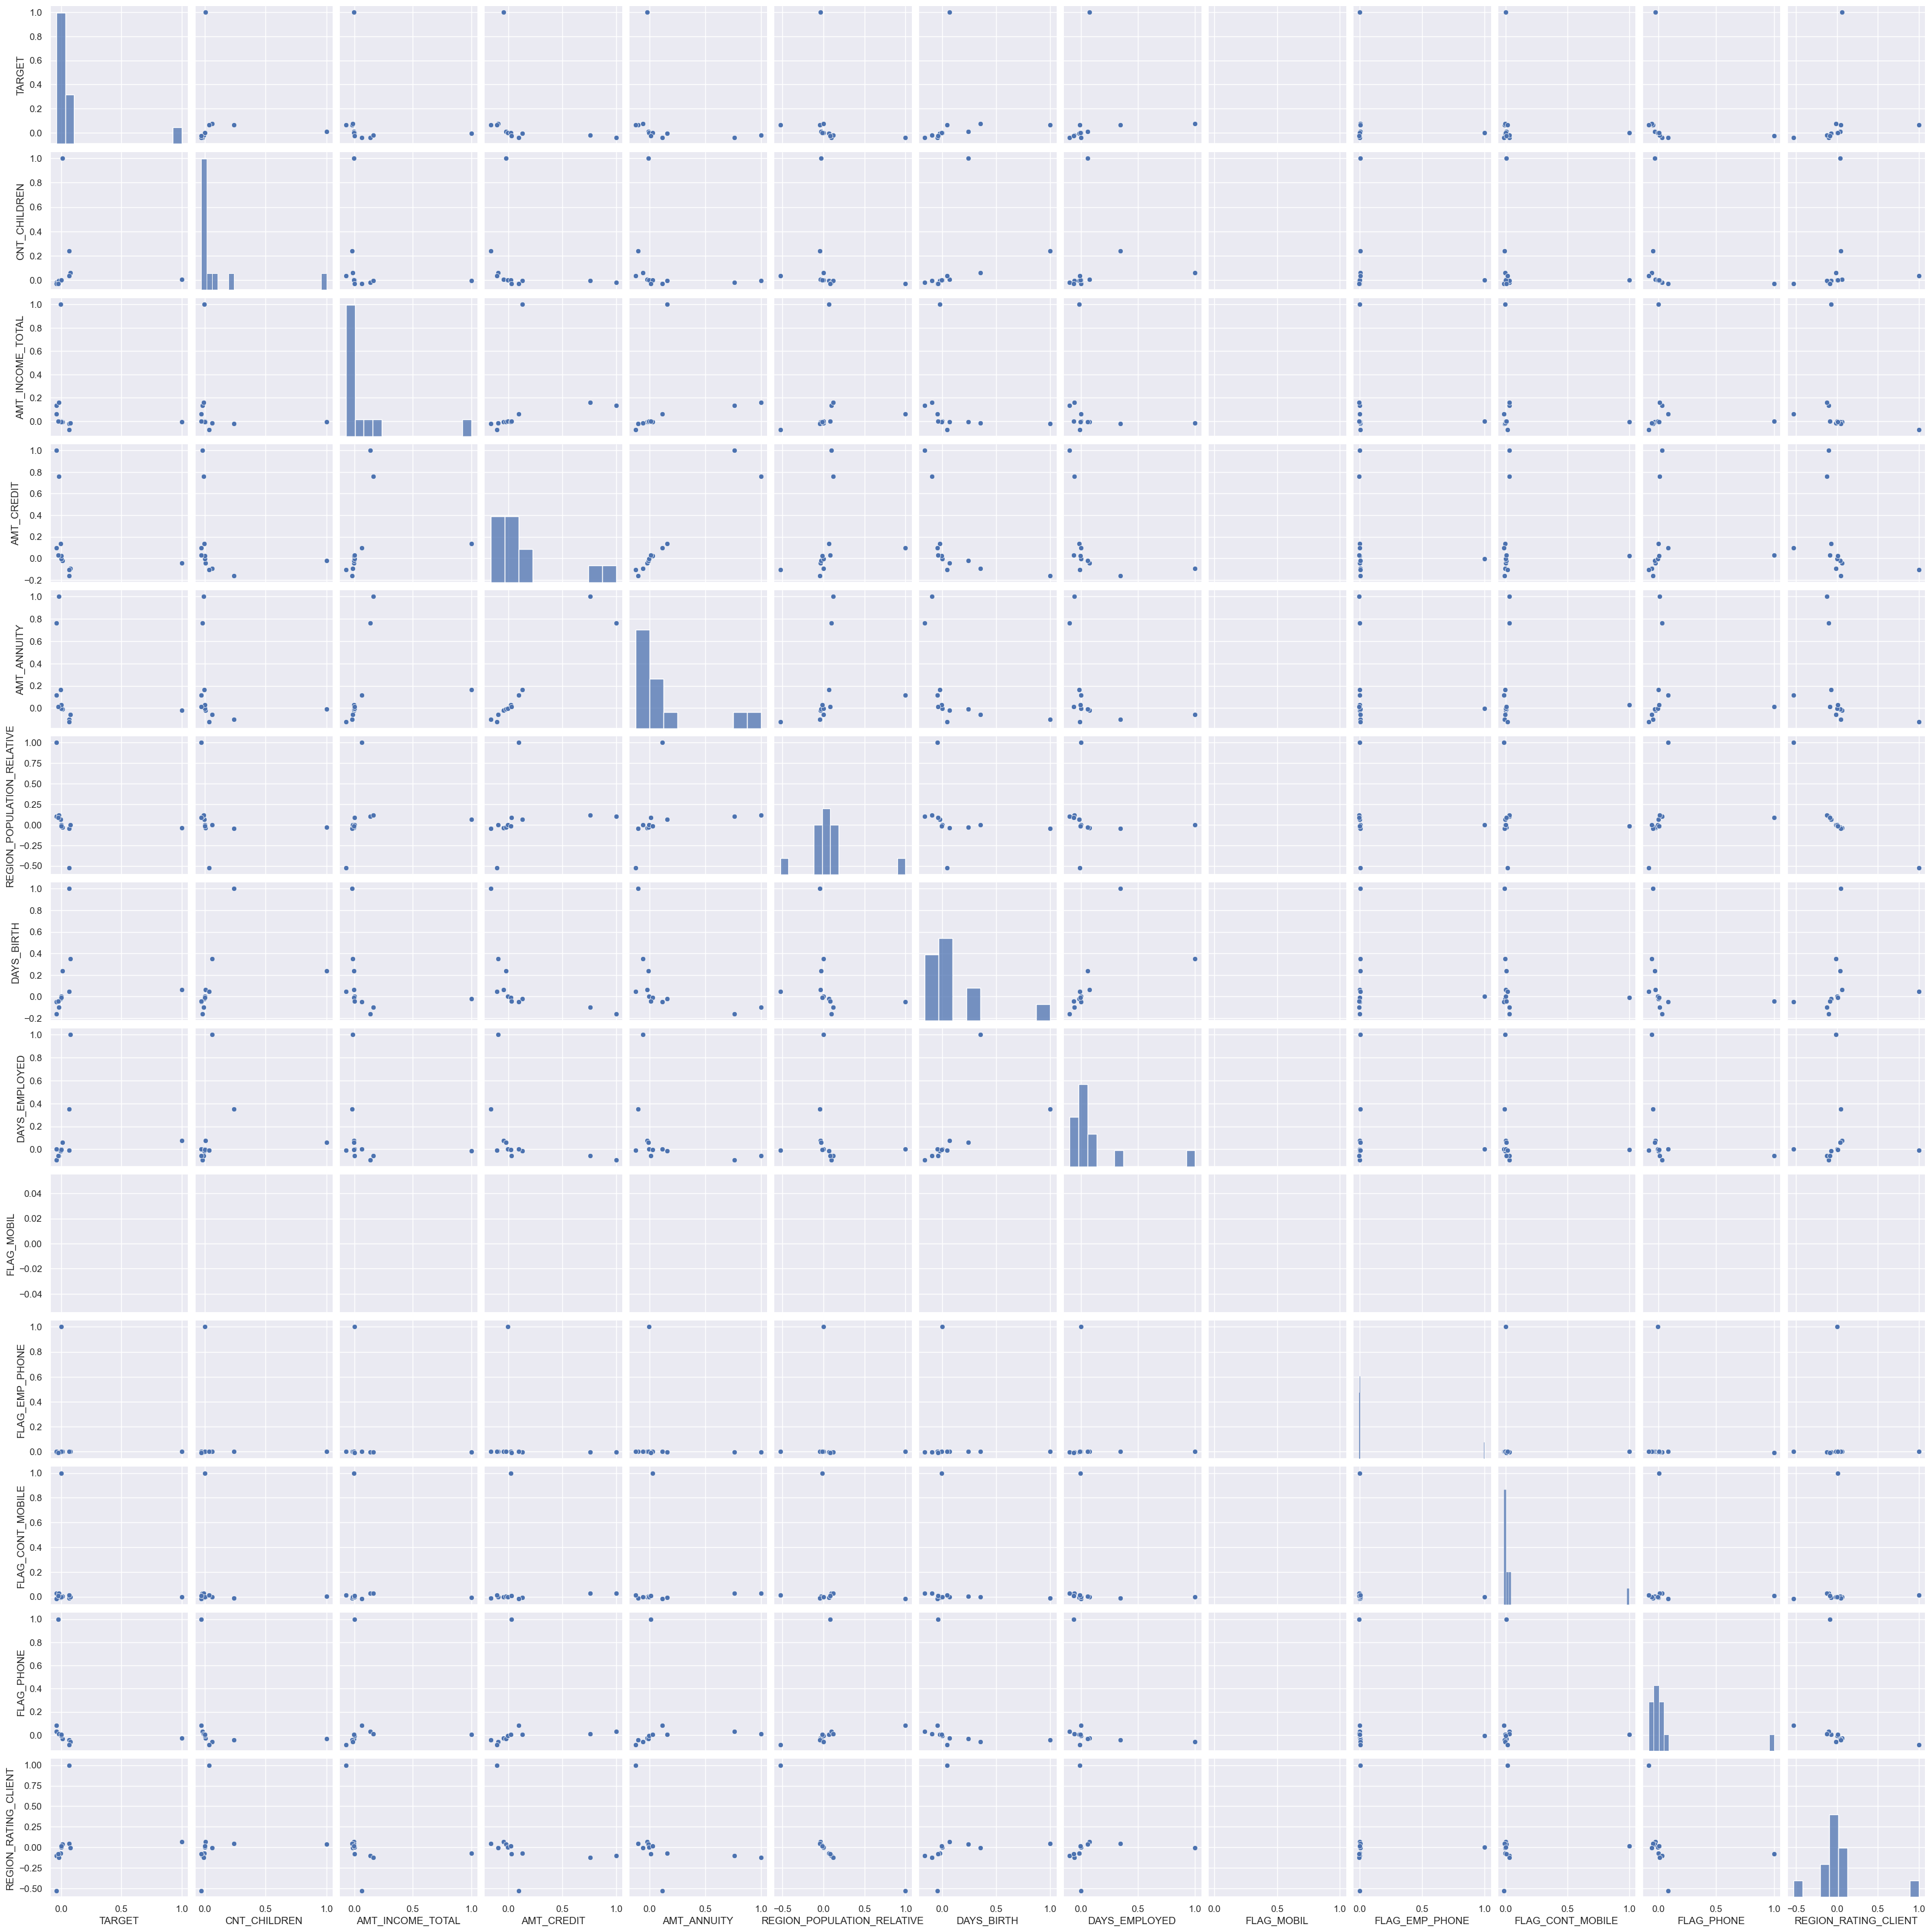

In [50]:
sns.pairplot(df_cleaned.corr(numeric_only=True))

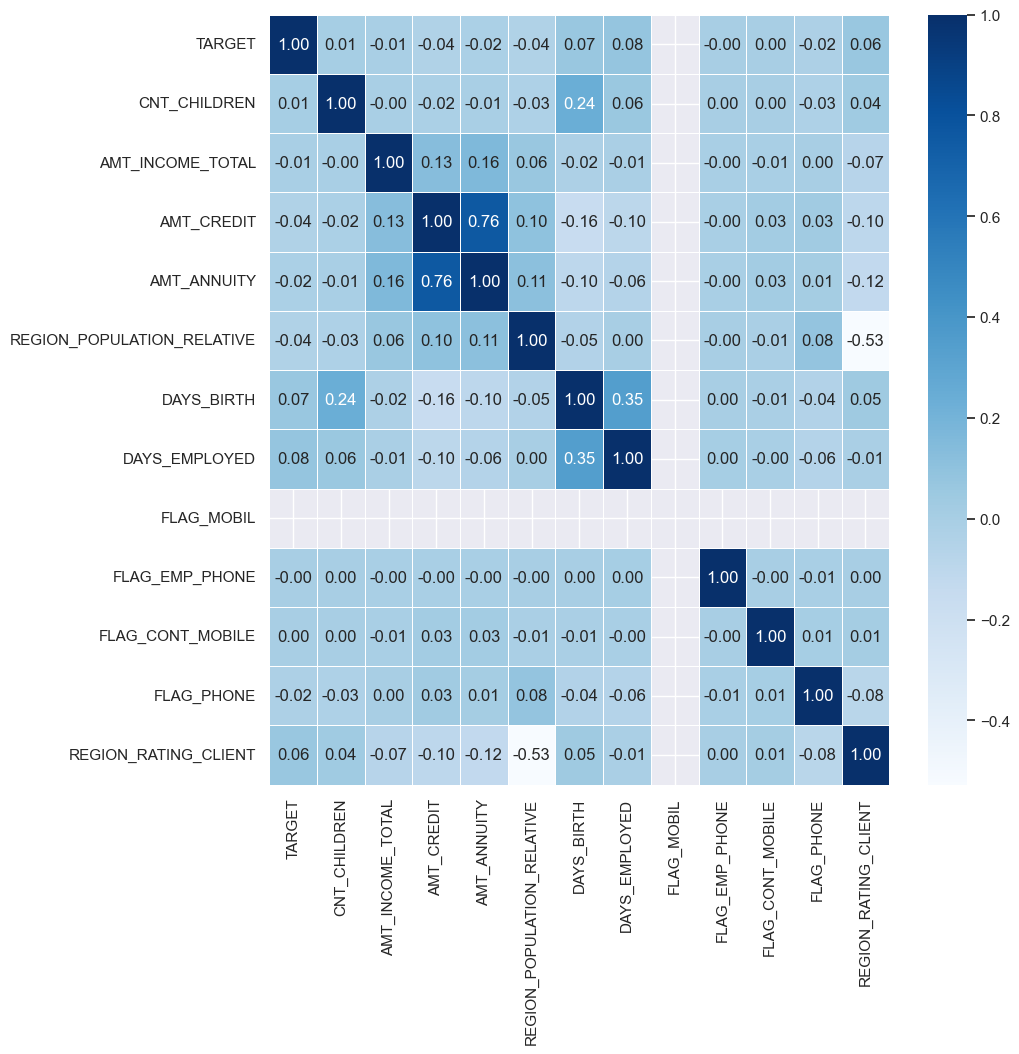

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f", linewidth=.5)
plt.show()

## Exploratory Data Analysis

In [52]:
num_features = []
cat_features = []

for col, dtype in df_cleaned.dtypes.items():
    if dtype == "object":
        cat_features.append(col)
    else:
        num_features.append(col)

print("Numerical features:", num_features)
print("         ")
print("Categorical features:", cat_features)

Numerical features: ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT']
         
Categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [53]:
for i in cat_features:
    print(f"Categories in {i} variable:", end=" ")
    print(df_cleaned[i].unique())

Categories in NAME_CONTRACT_TYPE variable: ['Cash loans' 'Revolving loans']
Categories in CODE_GENDER variable: ['M' 'F' 'XNA']
Categories in FLAG_OWN_CAR variable: ['N' 'Y']
Categories in FLAG_OWN_REALTY variable: ['Y' 'N']
Categories in NAME_TYPE_SUITE variable: ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_A' 'Children'
 'Group of people' 'Other_B']
Categories in NAME_INCOME_TYPE variable: ['Working' 'State servant' 'Commercial associate' 'Student' 'Businessman'
 'Maternity leave' 'Pensioner']
Categories in NAME_EDUCATION_TYPE variable: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Categories in NAME_FAMILY_STATUS variable: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
Categories in NAME_HOUSING_TYPE variable: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Categories in OCCUPATION_TYPE variable: ['Laborers' 'Core staff' '

In [54]:
for i in cat_features:
    print(f"Number of Categories in {i} variable:", end=" ")
    print(df_cleaned[i].nunique())

Number of Categories in NAME_CONTRACT_TYPE variable: 2
Number of Categories in CODE_GENDER variable: 3
Number of Categories in FLAG_OWN_CAR variable: 2
Number of Categories in FLAG_OWN_REALTY variable: 2
Number of Categories in NAME_TYPE_SUITE variable: 7
Number of Categories in NAME_INCOME_TYPE variable: 7
Number of Categories in NAME_EDUCATION_TYPE variable: 5
Number of Categories in NAME_FAMILY_STATUS variable: 5
Number of Categories in NAME_HOUSING_TYPE variable: 6
Number of Categories in OCCUPATION_TYPE variable: 18
Number of Categories in ORGANIZATION_TYPE variable: 57


In [55]:
for i in num_features:
    print(f"Number of Unique Values in {i} variable:", end=" ")
    print(df_cleaned[i].nunique())

Number of Unique Values in TARGET variable: 2
Number of Unique Values in CNT_CHILDREN variable: 15
Number of Unique Values in AMT_INCOME_TOTAL variable: 1987
Number of Unique Values in AMT_CREDIT variable: 5087
Number of Unique Values in AMT_ANNUITY variable: 12735
Number of Unique Values in REGION_POPULATION_RELATIVE variable: 81
Number of Unique Values in DAYS_BIRTH variable: 16279
Number of Unique Values in DAYS_EMPLOYED variable: 12176
Number of Unique Values in FLAG_MOBIL variable: 1
Number of Unique Values in FLAG_EMP_PHONE variable: 2
Number of Unique Values in FLAG_CONT_MOBILE variable: 2
Number of Unique Values in FLAG_PHONE variable: 2
Number of Unique Values in REGION_RATING_CLIENT variable: 3


## Detecting and Treating Unformatted Values In Features

In [56]:
df_cleaned['CODE_GENDER'].value_counts()

CODE_GENDER
F      128746
M       81447
XNA         2
Name: count, dtype: int64

In [57]:
df_cleaned['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      171468
Family              26658
Spouse, partner      8143
Children             1878
Other_B              1245
Other_A               618
Group of people       185
Name: count, dtype: int64

In [58]:
df_cleaned['CODE_GENDER'] = df_cleaned['CODE_GENDER'].replace('XNA' , df_cleaned['CODE_GENDER'].mode()[0])
df_cleaned['NAME_TYPE_SUITE'] = df_cleaned['NAME_TYPE_SUITE'].replace(['Other_B','Other_A','Spouse, partner'],['Other','Other','Spouse partner'])

In [59]:
df_cleaned['CODE_GENDER'].value_counts()

CODE_GENDER
F    128748
M     81447
Name: count, dtype: int64

In [60]:
df_cleaned['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      171468
Family              26658
Spouse partner       8143
Children             1878
Other                1863
Group of people       185
Name: count, dtype: int64

In [61]:
df_eda = df_cleaned.copy()
df_eda.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government


## Feature Transformation

In [62]:
df_eda['AGE'] = (df_eda['DAYS_BIRTH'] / 365.25).abs()
df_eda['AGE'] = df_eda['AGE'].astype(int)
df_eda.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government,52


In [63]:
df_eda['YEARS_EMPLOYED'] = abs(df_eda['DAYS_EMPLOYED'] / 365.25)
df_eda['YEARS_EMPLOYED'] = df_eda['YEARS_EMPLOYED'].round(2)
df_eda.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3,25,1.74
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School,45,3.25
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government,52,0.62


## Univariate Analysis

In [64]:
num_features = []
cat_features = []

for col, dtype in df_eda.dtypes.items():
    if dtype == "object":
        cat_features.append(col)
    else:
        num_features.append(col)

print("Numerical features:", num_features)
print("         ")
print("Categorical features:", cat_features)

Numerical features: ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'AGE', 'YEARS_EMPLOYED']
         
Categorical features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


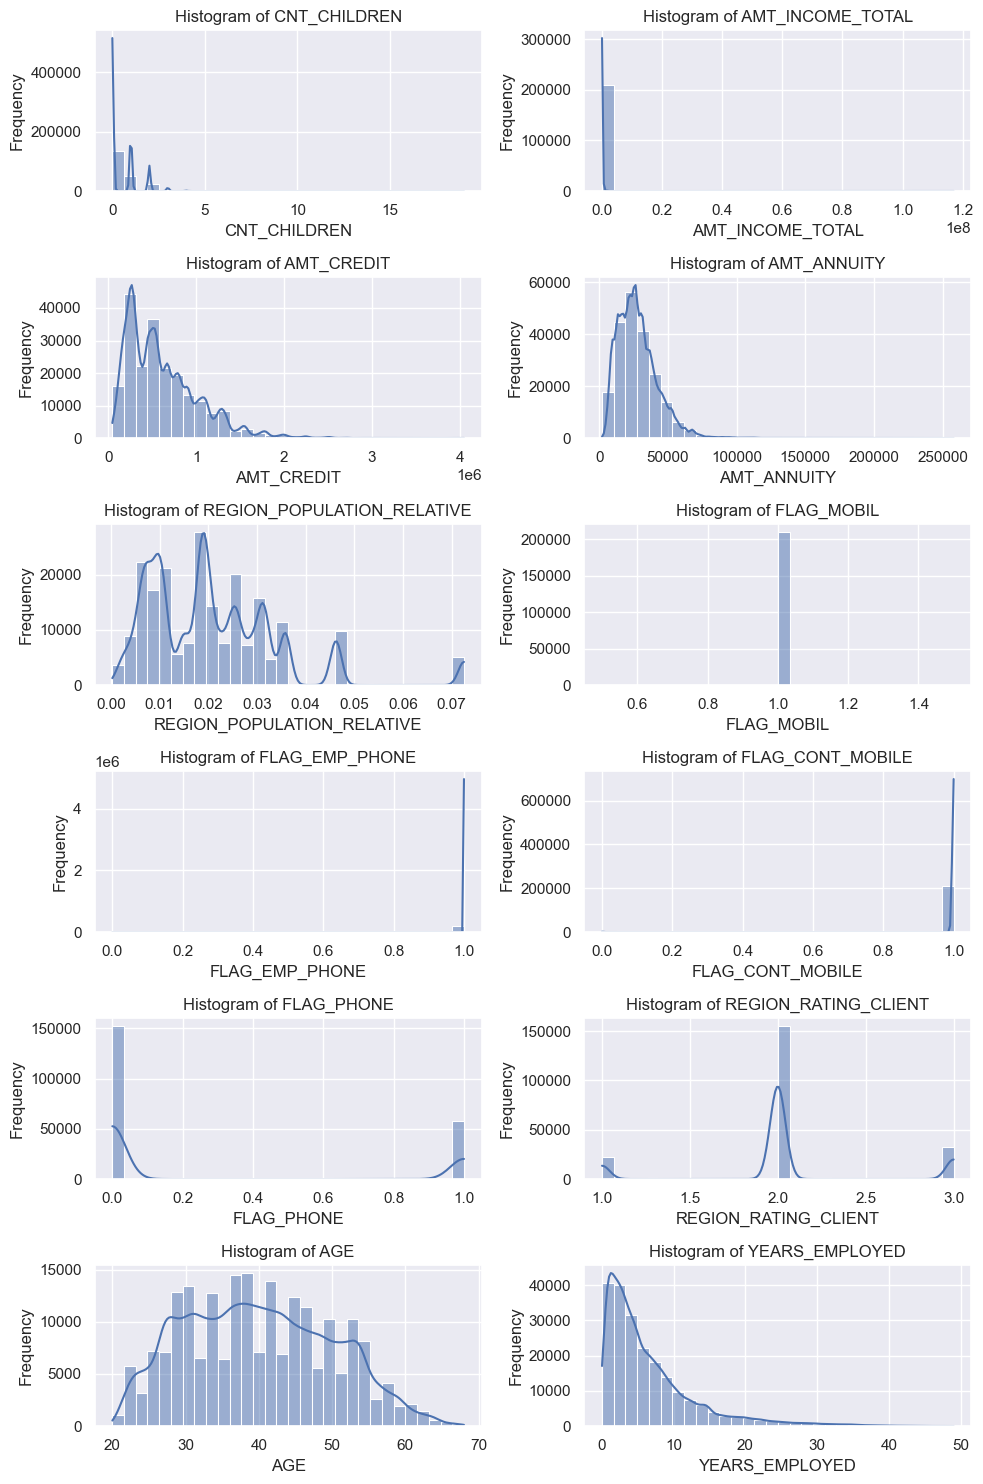

In [65]:
num_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
                 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'AGE', 'YEARS_EMPLOYED']

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(num_features):
    # Create histogram for each feature
    sns.histplot(df_eda[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if there are fewer features than the number of subplots
for j in range(len(num_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

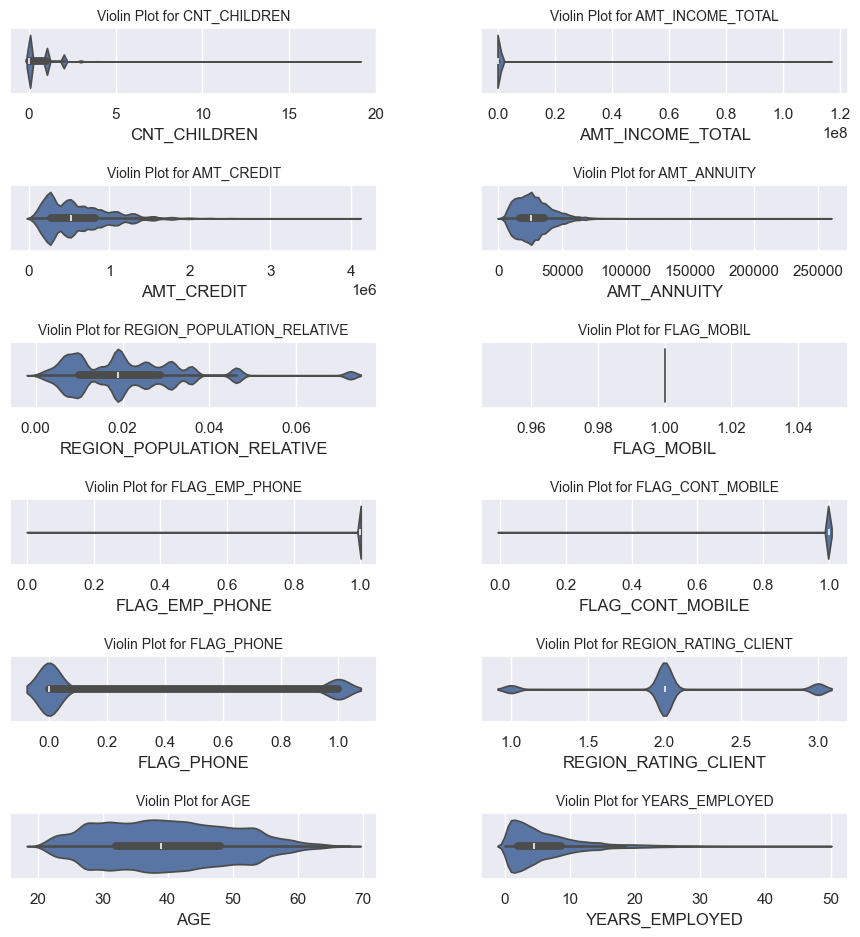

In [66]:
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(10,10)
plt.tight_layout(pad=3.50)

num_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
                'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
                'AGE', 'YEARS_EMPLOYED']

# Loop through columns and create box plots
for i, col in enumerate(num_features):
    sns.violinplot(x=df_eda[col], ax=axes[i//2, i%2])  # Adjusting indexing for subplots
    axes[i//2, i%2].set_title(f'Violin Plot for {col}', fontsize=10)

# Adjust the plot numbers
for j in range(len(num_features), len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.show()

## Bivariate Analysis

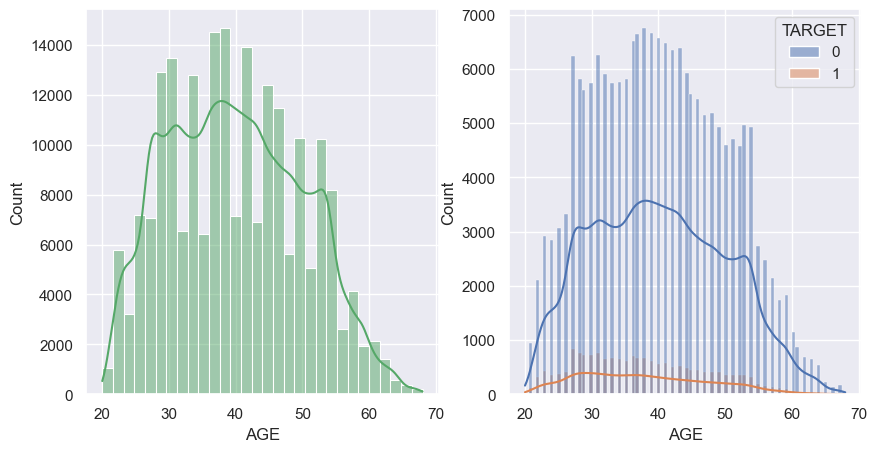

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df_eda,x='AGE',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_eda,x='AGE',kde=True,hue='TARGET')
plt.show()

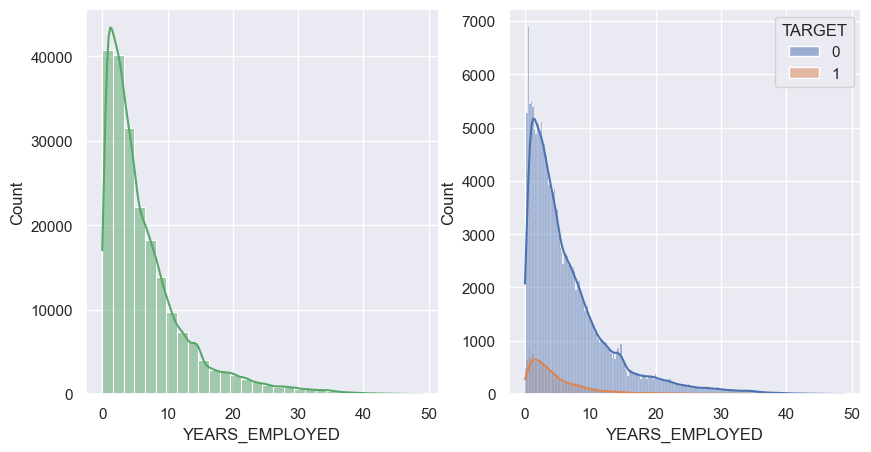

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df_eda,x='YEARS_EMPLOYED',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_eda,x='YEARS_EMPLOYED',kde=True,hue='TARGET')
plt.show()

**Insights**
- 1. Clients' ages range from 20 to 70. Among those with a target value of 0, the count falls within the range of 1 to 900.
- 2. Clients' employment years range from 0 to 50. Among those with a target value of 1, clients are in the employment year range of 0 to 25, and their counts range from 1 to 800.

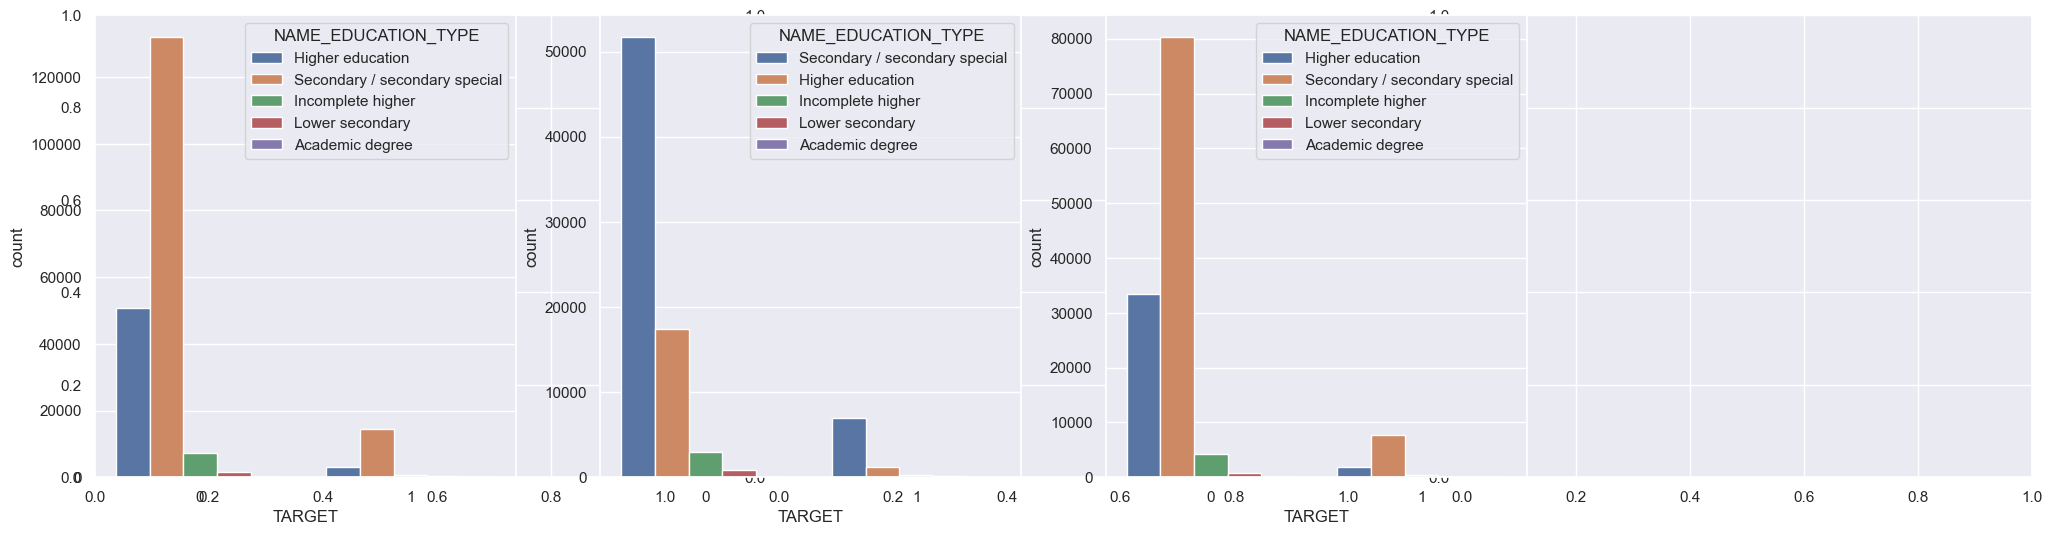

In [69]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.countplot(data=df_eda, x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.subplot(142)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'M'], x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.subplot(143)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'F'], x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.show()

**Insights**
- 1.The count of clients with secondary and secondary special education levels is higher, indicating that they receive more loans regardless of gender. The second highest group receiving loans consists of clients with higher education.

- 2.Specifically, 55,000 males and 80,000 females with secondary and secondary special education levels have received loans. Moreover, regardless of gender, a larger number of clients categorized as non-defaulters (0) are observed.


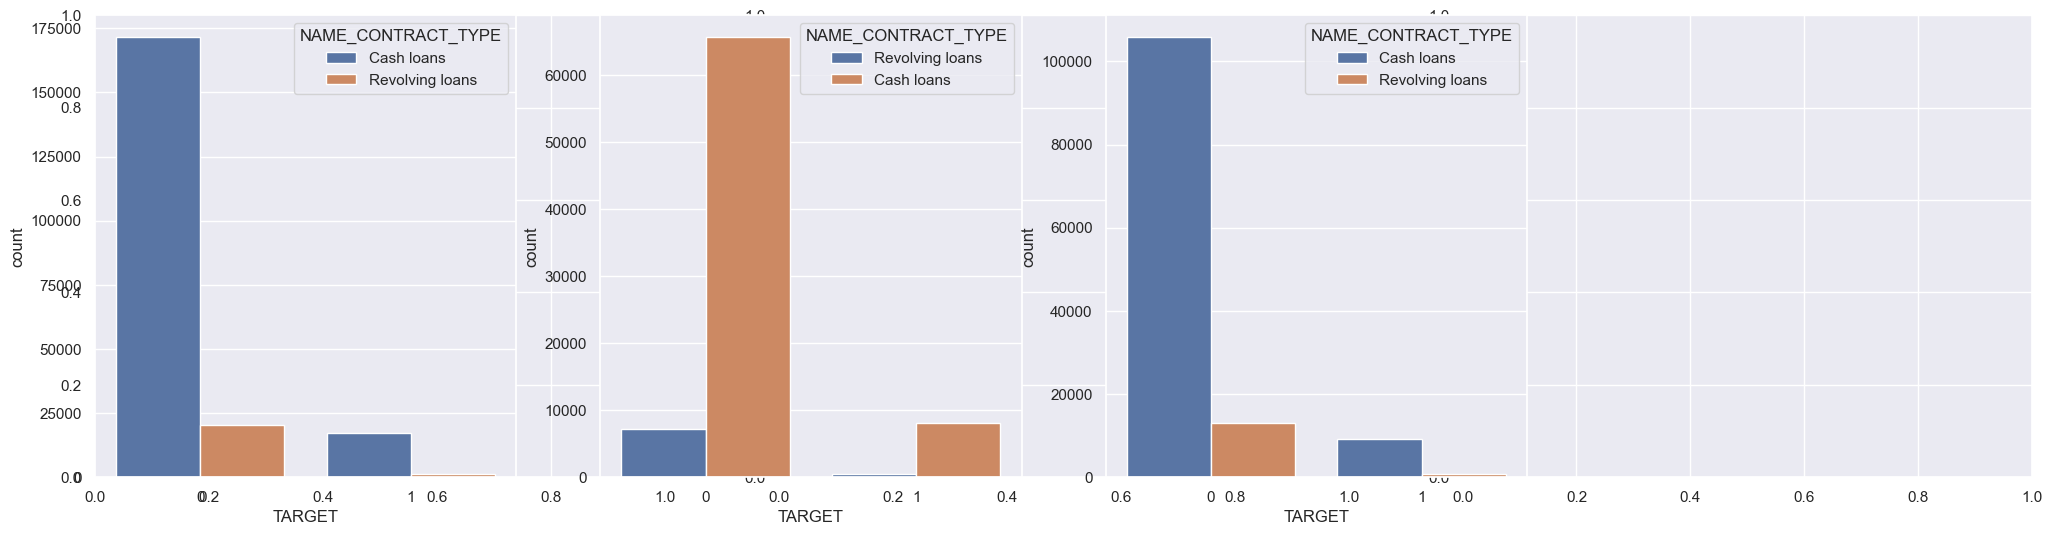

In [70]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.countplot(data=df_eda, x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.subplot(142)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'M'], x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.subplot(143)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'F'], x='TARGET', hue='NAME_CONTRACT_TYPE')
plt.show()

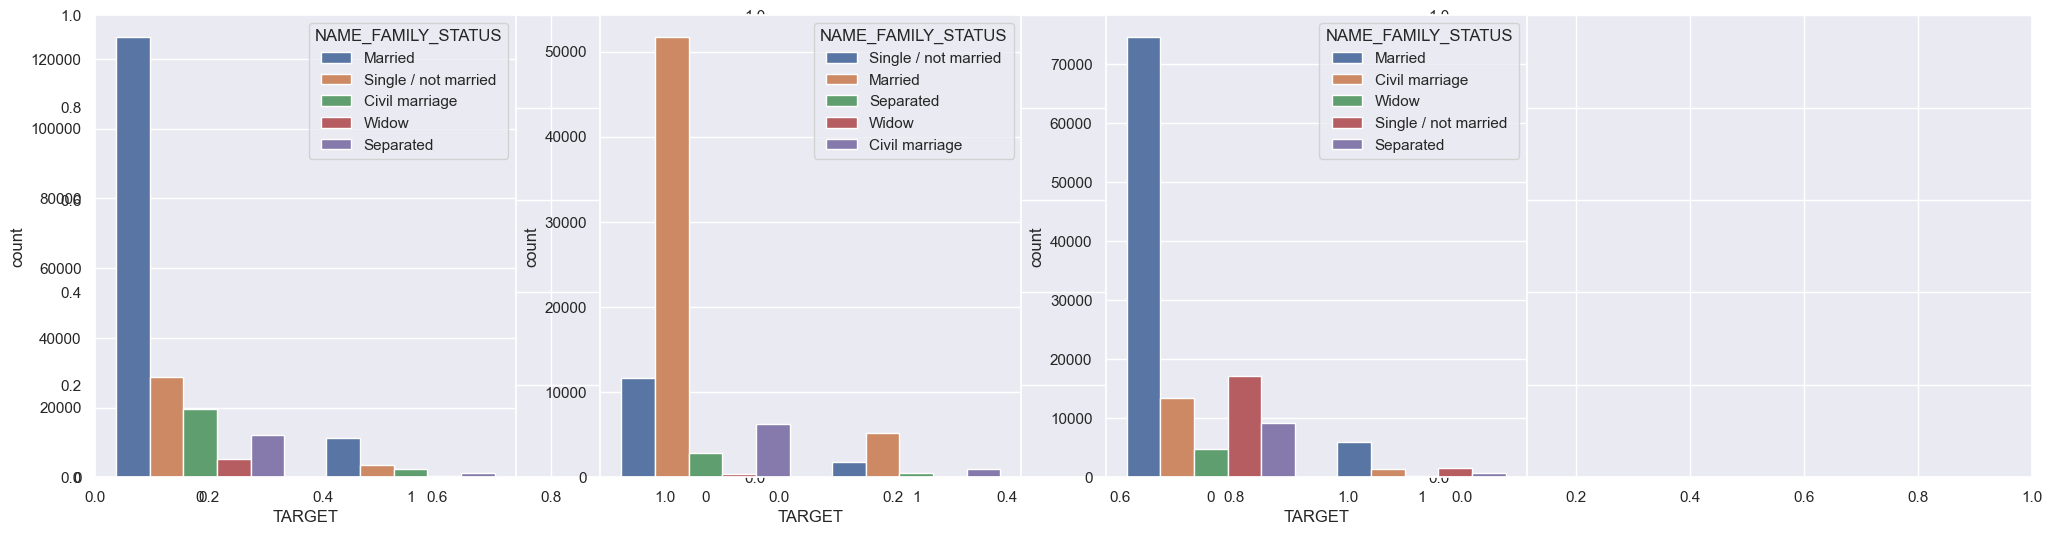

In [71]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.countplot(data=df_eda, x='TARGET', hue='NAME_FAMILY_STATUS')
plt.subplot(142)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'M'], x='TARGET', hue='NAME_FAMILY_STATUS')
plt.subplot(143)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'F'], x='TARGET', hue='NAME_FAMILY_STATUS')
plt.show()

**Insights**
- 1.Married clients tend to obtain more cash loans, and they also represent a higher count in the category where 0 indicates non-defaulters.

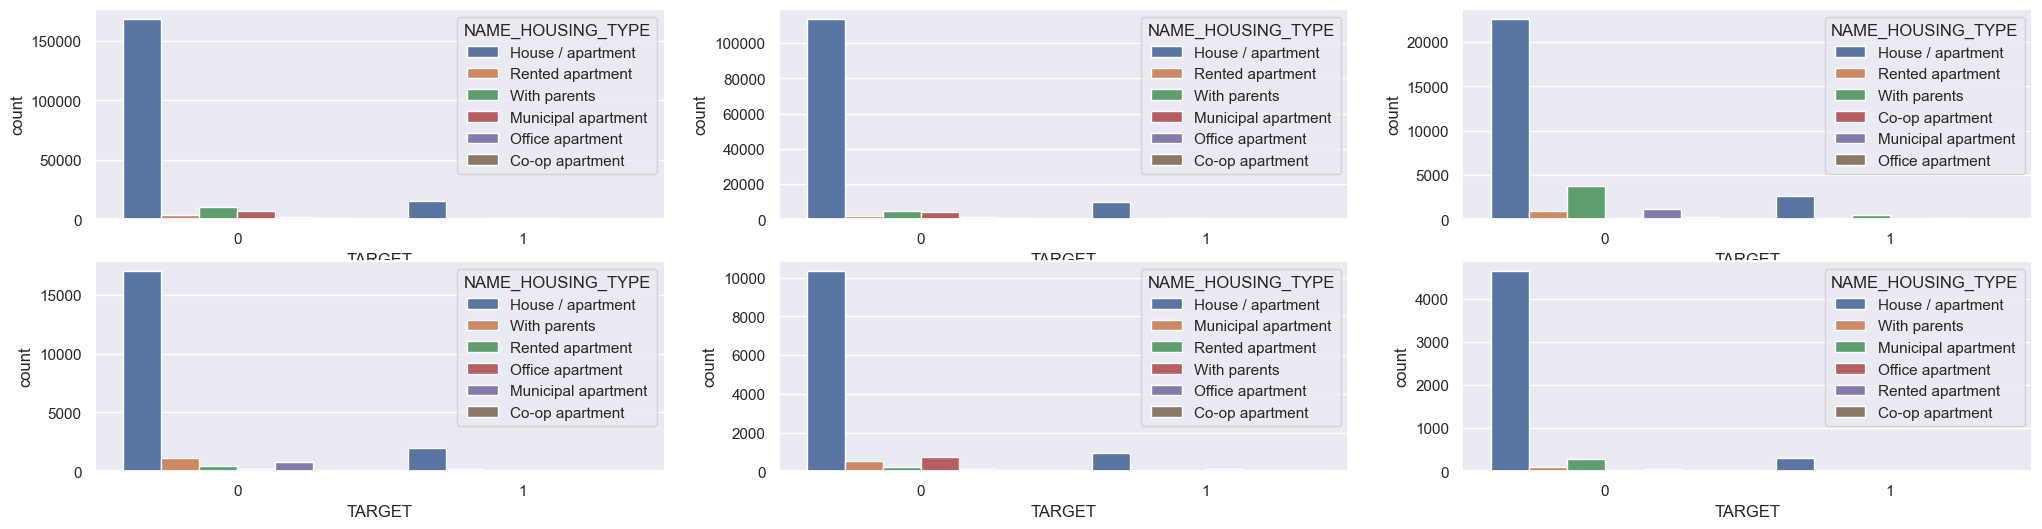

In [72]:
plt.subplots(2, 3, figsize=(25, 6))

plt.subplot(231)
ax = sns.countplot(data=df_eda, x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(232)
ax = sns.countplot(data=df_eda[df_eda['NAME_FAMILY_STATUS'] == 'Married'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(233)
ax = sns.countplot(data=df_eda[df_eda['NAME_FAMILY_STATUS'] == 'Single / not married'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(234)
ax = sns.countplot(data=df_eda[df_eda['NAME_FAMILY_STATUS'] == 'Civil marriage'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(235)
ax = sns.countplot(data=df_eda[df_eda['NAME_FAMILY_STATUS'] == 'Separated'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.subplot(236)
ax = sns.countplot(data=df_eda[df_eda['NAME_FAMILY_STATUS'] == 'Widow'], x='TARGET', hue='NAME_HOUSING_TYPE')

plt.show()

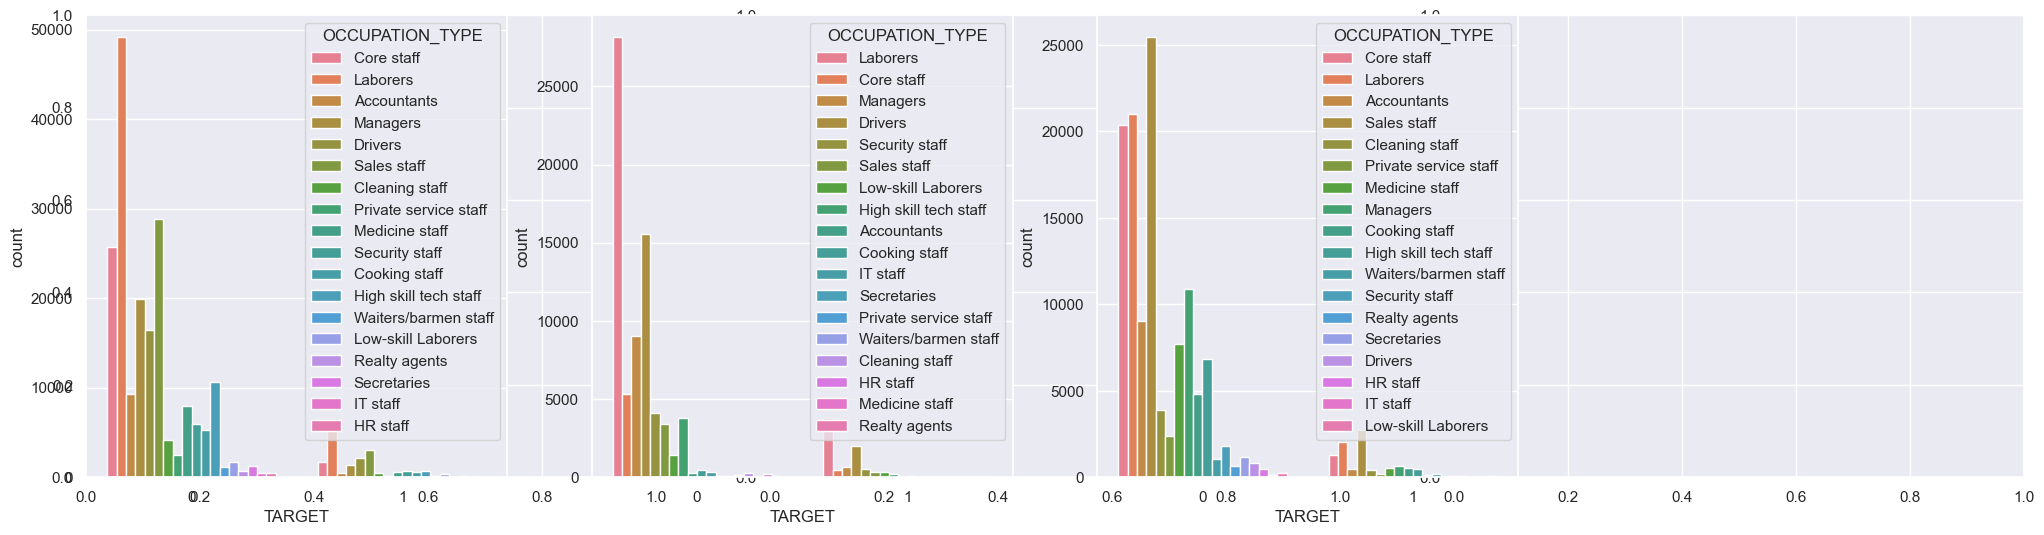

In [73]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.countplot(data=df_eda, x='TARGET', hue='OCCUPATION_TYPE')
plt.subplot(142)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'M'], x='TARGET', hue='OCCUPATION_TYPE')
plt.subplot(143)
ax = sns.countplot(data=df_eda[df_eda['CODE_GENDER'] == 'F'], x='TARGET', hue='OCCUPATION_TYPE')
plt.show()

**Insights**
- 1.Overall, 40,000 individuals working as laborers have obtained more loans. Among them, 27,000 are male laborers. In terms of females, those working as sales staff have received the highest number of loans, totaling 25,000 clients.

## Feature Encoding

In [74]:
df_cleaned.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government


In [75]:
for i in cat_features:
    print(f"Number of Categories in {i} variable:", end=" ")
    print(df_cleaned[i].nunique())

Number of Categories in NAME_CONTRACT_TYPE variable: 2
Number of Categories in CODE_GENDER variable: 2
Number of Categories in FLAG_OWN_CAR variable: 2
Number of Categories in FLAG_OWN_REALTY variable: 2
Number of Categories in NAME_TYPE_SUITE variable: 6
Number of Categories in NAME_INCOME_TYPE variable: 7
Number of Categories in NAME_EDUCATION_TYPE variable: 5
Number of Categories in NAME_FAMILY_STATUS variable: 

5
Number of Categories in NAME_HOUSING_TYPE variable: 6
Number of Categories in OCCUPATION_TYPE variable: 18
Number of Categories in ORGANIZATION_TYPE variable: 57


In [76]:
for i in cat_features:
    print(f"Categories in {i} variable:", end=" ")
    print(df_cleaned[i].unique())

Categories in NAME_CONTRACT_TYPE variable: ['Cash loans' 'Revolving loans']
Categories in CODE_GENDER variable: ['M' 'F']
Categories in FLAG_OWN_CAR variable: 

['N' 'Y']
Categories in FLAG_OWN_REALTY variable: ['Y' 'N']
Categories in NAME_TYPE_SUITE variable: ['Unaccompanied' 'Family' 'Spouse partner' 'Other' 'Children'
 'Group of people']
Categories in NAME_INCOME_TYPE variable: ['Working' 'State servant' 'Commercial associate' 'Student' 'Businessman'
 'Maternity leave' 'Pensioner']
Categories in NAME_EDUCATION_TYPE variable: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Categories in NAME_FAMILY_STATUS variable: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
Categories in NAME_HOUSING_TYPE variable: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Categories in OCCUPATION_TYPE variable: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barm

In [77]:
df_cleaned['NAME_CONTRACT_TYPE'] = df_cleaned['NAME_CONTRACT_TYPE'].replace(['Cash loans' ,'Revolving loans'],[0,1])
df_cleaned['CODE_GENDER'] = df_cleaned['CODE_GENDER'].replace(['M', 'F'],[0,1])
df_cleaned['FLAG_OWN_CAR'] = df_cleaned['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
df_cleaned['FLAG_OWN_REALTY'] = df_cleaned['FLAG_OWN_REALTY'].replace(['Y','N'],[0,1])

In [78]:
df_cleaned.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE
0,1,0,0,0,0,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3
1,0,0,1,0,1,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School
2,0,1,0,1,0,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government


In [79]:
df_suite = pd.get_dummies(df_cleaned['NAME_TYPE_SUITE'],drop_first=True).astype('int')
df_suite.head()

,Family,Group of people,Other,Spouse partner,Unaccompanied
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [80]:
df_income = pd.get_dummies(df_cleaned['NAME_INCOME_TYPE'],drop_first=True).astype('int')
df_income.head()

,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [81]:
df_edu = pd.get_dummies(df_cleaned['NAME_EDUCATION_TYPE'],drop_first=True).astype('int')
df_edu.head()

,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [82]:
df_fam = pd.get_dummies(df_cleaned['NAME_FAMILY_STATUS'],drop_first=True).astype('int')
df_fam.head()

,Married,Separated,Single / not married,Widow
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [83]:
df_house = pd.get_dummies(df_cleaned['NAME_HOUSING_TYPE'],drop_first=True).astype('int')
df_house.head()

,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [84]:
df_occ = pd.get_dummies(df_cleaned['OCCUPATION_TYPE'],drop_first=True).astype('int')
df_occ.head()

,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
df_org = pd.get_dummies(df_cleaned['ORGANIZATION_TYPE'],drop_first=True).astype('int')
df_org.head()

,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
df_con = pd.concat([df_cleaned,df_suite,df_income,df_edu,df_fam,df_house,df_occ,df_org], axis=1)
df_con = df_con.reset_index(drop=True)

In [87]:
df_con.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,Family,Group of people,Other,Spouse partner,Unaccompanied,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,1,0,0,0,0,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1,1,1,1,Laborers,2,Business Entity Type 3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1,1,1,1,Core staff,1,School,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1,1,1,1,Laborers,2,Government,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,1,1,1,0,Laborers,2,Business Entity Type 3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,1,1,1,0,Core staff,2,Religion,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
df_con.tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,ORGANIZATION_TYPE,Family,Group of people,Other,Spouse partner,Unaccompanied,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
210190,0,0,1,0,0,0,153000.0,331920.0,16096.5,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,1,1,1,0,Sales staff,2,Self-employed,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210191,0,0,0,0,1,0,157500.0,254700.0,27558.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,1,1,1,0,Sales staff,1,Services,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
210192,0,0,1,0,0,0,153000.0,677664.0,29979.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,1,1,1,0,Managers,3,School,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210193,1,0,1,0,0,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,1,1,1,0,Laborers,2,Business Entity Type 1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210194,0,0,1,0,1,0,157500.0,675000.0,49117.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,1,1,1,1,Laborers,1,Business Entity Type 3,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
df_con.shape

(210195, 121)

In [90]:
column_to_drop=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
df_con = df_con.drop(columns = column_to_drop,axis =1)

In [91]:
df_con.shape

(210195, 114)

In [92]:
df_con.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT,Family,Group of people,Other,Spouse partner,Unaccompanied,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,1,0,0,0,0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,1,1,1,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,1,1,1,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,1,1,1,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,1,1,1,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Budling
## Classification Model

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report,roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE

In [94]:
x = df_con.drop('TARGET',axis=1)
y = df_con['TARGET']

In [95]:
x.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT,Family,Group of people,Other,Spouse partner,Unaccompanied,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,0,0,0,0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,1,1,1,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
x.shape

(210195, 113)

In [97]:
y.head(2)

0    1
1    0
Name: TARGET, dtype: int64

In [98]:
df_con['TARGET'].value_counts(normalize=True)

TARGET
0    0.912015
1    0.087985
Name: proportion, dtype: float64

In [99]:
df_con['TARGET'].value_counts()

TARGET
0    191701
1     18494
Name: count, dtype: int64

## Smote For Imbalanced Data

In [100]:
sm = SMOTE(sampling_strategy=.40,random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(x, y)

In [101]:
y_train_resample.value_counts()

TARGET
0    191701
1     76680
Name: count, dtype: int64

In [102]:
y_train_resample.value_counts(normalize = True)

TARGET
0    0.714287
1    0.285713
Name: proportion, dtype: float64

In [103]:
# Orginal Shape of DataSet
print(x.shape)
print(y.shape)
# After Resampling with Somte
print(X_train_resample.shape)
print(y_train_resample.shape)

(210195, 113)
(210195,)
(268381, 113)
(268381,)


In [104]:
x = X_train_resample
x.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_RATING_CLIENT,Family,Group of people,Other,Spouse partner,Unaccompanied,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Agriculture,Bank,Business Entity Type 1,Business Entity Type 2,Business Entity Type 3,Cleaning,Construction,Culture,Electricity,Emergency,Government,Hotel,Housing,Industry: type 1,Industry: type 10,Industry: type 11,Industry: type 12,Industry: type 13,Industry: type 2,Industry: type 3,Industry: type 4,Industry: type 5,Industry: type 6,Industry: type 7,Industry: type 8,Industry: type 9,Insurance,Kindergarten,Legal Services,Medicine,Military,Mobile,Other,Police,Postal,Realtor,Religion,Restaurant,School,Security,Security Ministries,Self-employed,Services,Telecom,Trade: type 1,Trade: type 2,Trade: type 3,Trade: type 4,Trade: type 5,Trade: type 6,Trade: type 7,Transport: type 1,Transport: type 2,Transport: type 3,Transport: type 4,University
0,0,0,0,0,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,1,1,1,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,1,1,1,1,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
y = y_train_resample
y.head(3)

0    1
1    0
2    0
Name: TARGET, dtype: int64

In [106]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(187866, 113)
(80515, 113)
(187866,)
(80515,)


## Standardizing The Values

In [108]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Transform both the training and test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [109]:
X_train_scaled[0]

array([-3.15139690e-01, -1.10204948e+00,  1.44892477e+00,  1.63174907e+00,
        7.51607094e-01, -1.96029219e-01,  7.66363406e-01,  7.59970509e-01,
       -9.47313069e-02, -1.92920639e+00, -3.66572909e-01,  0.00000000e+00,
        8.31883688e-03,  5.08228185e-02, -5.45737502e-01, -5.46521171e-02,
       -3.36168975e-01, -2.65164572e-02, -8.46308853e-02, -1.78023169e-01,
        5.17408640e-01, -5.52847627e-01, -3.26282075e-03, -3.26282075e-03,
       -2.68967444e-01, -6.10425991e-03,  8.09538692e-01, -5.10208539e-01,
       -1.75122182e-01, -8.53931532e-02,  6.81801677e-01,  8.25505023e-01,
       -2.28807075e-01, -3.86686832e-01, -1.44433616e-01,  4.33064249e-01,
       -1.70565536e-01, -8.33777644e-02, -1.23891865e-01, -2.21723856e-01,
       -1.33838985e-01, -1.52101896e-01, -3.43051752e-01, -2.78783122e-01,
       -4.58437256e-02, -2.11213477e-01, -4.33882028e-02, -5.41045366e-01,
       -8.81946840e-02, -2.96594366e-01, -1.82181668e-01, -1.00079806e-01,
       -5.25823933e-02, -

In [110]:
x_train = X_train_scaled

In [111]:
x_train

array([[-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [ 3.17319598,  0.90740028, -0.69016696, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       ...,
       [-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969,  0.90740028, -0.69016696, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ]])

In [112]:
X_test_scaled[0]

array([-3.15139690e-01,  9.07400277e-01,  1.44892477e+00, -6.12839325e-01,
        7.51607094e-01,  9.18643033e-02,  7.66363406e-01, -7.87977950e-02,
       -1.16304808e+00, -2.32220898e-01, -6.90384426e-01,  0.00000000e+00,
        8.31883688e-03,  5.08228185e-02, -5.45737502e-01, -5.46521171e-02,
       -3.36168975e-01, -2.65164572e-02, -8.46308853e-02, -1.78023169e-01,
        5.17408640e-01, -5.52847627e-01, -3.26282075e-03, -3.26282075e-03,
       -2.68967444e-01, -6.10425991e-03,  8.09538692e-01,  1.95998288e+00,
       -1.75122182e-01, -8.53931532e-02, -1.46670217e+00,  8.25505023e-01,
       -2.28807075e-01, -3.86686832e-01, -1.44433616e-01, -2.30912619e+00,
       -1.70565536e-01, -8.33777644e-02, -1.23891865e-01,  4.51011460e+00,
       -1.33838985e-01, -1.52101896e-01, -3.43051752e-01, -2.78783122e-01,
       -4.58437256e-02, -2.11213477e-01, -4.33882028e-02, -5.41045366e-01,
       -8.81946840e-02,  3.37160821e+00, -1.82181668e-01, -1.00079806e-01,
       -5.25823933e-02, -

In [113]:
x_test = X_test_scaled

In [114]:
x_test

array([[-0.31513969,  0.90740028,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969,  0.90740028, -0.69016696, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       ...,
       [-0.31513969,  0.90740028, -0.69016696, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969, -1.10204948,  1.44892477, ..., -0.06514872,
        -0.13037695, -0.0621559 ],
       [-0.31513969,  0.90740028, -0.69016696, ..., -0.06514872,
        -0.13037695, -0.0621559 ]])

In [115]:
y_train.head(1)

73077    0
Name: TARGET, dtype: int64

In [116]:
y_test.head(1)

151016    0
Name: TARGET, dtype: int64

In [117]:
rf =  RandomForestClassifier()
dtr = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
gn = GaussianNB()

models = [rf, dtr, knn, gbc,abc,gn]
metrics_list = []

for model in models:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_metrics = {'Algorithm'    : str(model).split('(')[0],
                        'Accuracy_Train': accuracy_train,
                        'Accuracy_Test' : accuracy_test}

    metrics_list.append(accuracy_metrics)

In [118]:
Best_cls_model =pd.DataFrame(metrics_list)
Best_cls_model

,Algorithm,Accuracy_Train,Accuracy_Test
0,RandomForestClassifier,0.999973,0.922747
1,DecisionTreeClassifier,1.000000,0.849680
2,KNeighborsClassifier,0.929333,0.919220
3,GradientBoostingClassifier,0.903985,0.905210
4,AdaBoostClassifier,0.903303,0.903919
5,GaussianNB,0.532688,0.533689


## Hyper Parameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50 , 100],
    'max_depth': [10, 15],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [4, 6],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

print("Best Cross-validated Parameters: ", grid_search.best_params_)
print("Best Cross-validated Score: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Cross-validated Parameters:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 100}
Best Cross-validated Score:  0.8969478230848743


## Training Model With Best Params

In [120]:
rf_cls = RandomForestClassifier(max_depth = 15 , max_features = 'sqrt', min_samples_split = 6, n_estimators = 100)
rf_cls.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=6)

In [121]:
x_pred=rf_cls.predict(x_train)
y_pred=rf_cls.predict(x_test)

In [122]:
# Training Accuracy
metrics.accuracy_score(y_train, x_pred)

0.900780343436279

In [123]:
# Testing Accuracy
metrics.accuracy_score(y_test, y_pred)

0.8984164441408433

## Confusion Matrix

In [124]:
# Testing Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, x_pred))
print("Classification Report:")
print(classification_report(y_train, x_pred))

Confusion Matrix:
[[133775    552]
 [ 18088  35451]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    134327
           1       0.98      0.66      0.79     53539

    accuracy                           0.90    187866
   macro avg       0.93      0.83      0.86    187866
weighted avg       0.91      0.90      0.89    187866



In [125]:
# Testing Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[57137   237]
 [ 7942 15199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     57374
           1       0.98      0.66      0.79     23141

    accuracy                           0.90     80515
   macro avg       0.93      0.83      0.86     80515
weighted avg       0.91      0.90      0.89     80515



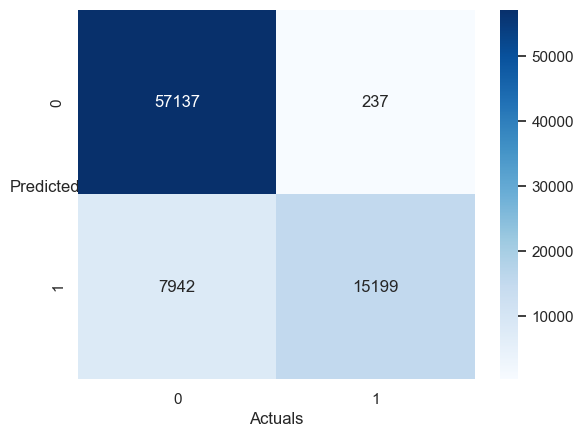

In [126]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues',annot=True,fmt='.5g')
plt.xlabel('Actuals')
plt.ylabel('Predicted',rotation=0)
plt.show()

## AUC and ROC Curve
#### For Training

AUC: 0.947


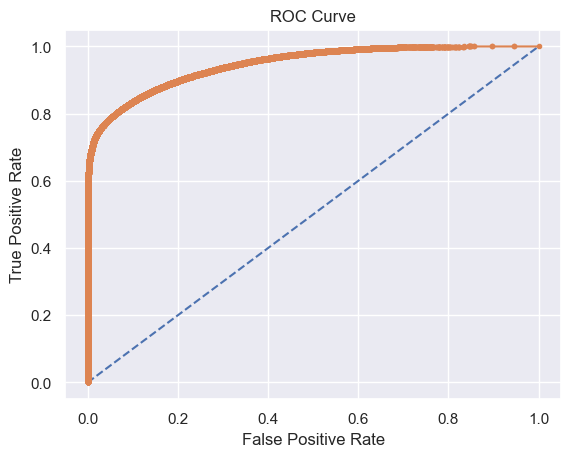

In [127]:
# AUC and ROC for the training data

# predict probabilities using predict_proba
probs = rf_cls.predict_proba(x_train)[:, 1]  # Extracting probabilities for the positive class
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### For Testing

AUC: 0.908


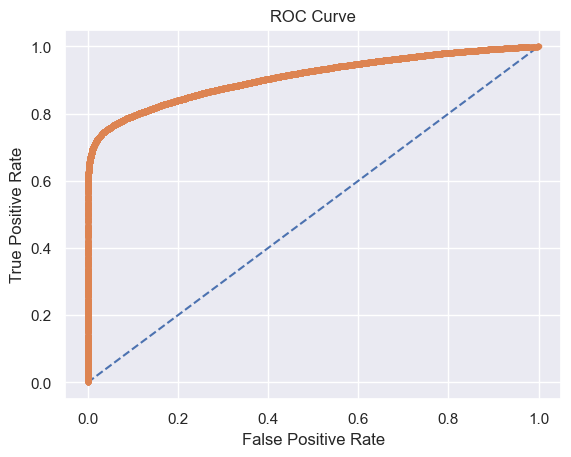

In [128]:
# AUC and ROC for the training data

# predict probabilities using predict_proba
probs = rf_cls.predict_proba(x_test)[:, 1]  # Extracting probabilities for the positive class
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Pickling The Best Model

In [129]:
import pickle
with open('C:/Users/Gayathri/OneDrive/Desktop/fair final/ClassifierModel_FinancialRisk.pkl', 'wb') as file:
    pickle.dump(rf_cls, file)

In [130]:
with open('C:/Users/Gayathri/OneDrive/Desktop/fair final/StandardScaler_FinancialRisk.pkl','wb') as files:
    pickle.dump(scaler,files)

In [131]:
# Loading the  regressor model 
import pickle
with open('C:/Users/Gayathri/OneDrive/Desktop/fair final/ClassifierModel_FinancialRisk.pkl','rb') as file:
    reg_cls= pickle.load(file)

In [132]:
# Loading the  regressor model 
with open('C:/Users/Gayathri/OneDrive/Desktop/fair final/StandardScaler_FinancialRisk.pkl','rb') as files:
    std_scaler= pickle.load(files)

In [133]:
x_test[0]

array([-3.15139690e-01,  9.07400277e-01,  1.44892477e+00, -6.12839325e-01,
        7.51607094e-01,  9.18643033e-02,  7.66363406e-01, -7.87977950e-02,
       -1.16304808e+00, -2.32220898e-01, -6.90384426e-01,  0.00000000e+00,
        8.31883688e-03,  5.08228185e-02, -5.45737502e-01, -5.46521171e-02,
       -3.36168975e-01, -2.65164572e-02, -8.46308853e-02, -1.78023169e-01,
        5.17408640e-01, -5.52847627e-01, -3.26282075e-03, -3.26282075e-03,
       -2.68967444e-01, -6.10425991e-03,  8.09538692e-01,  1.95998288e+00,
       -1.75122182e-01, -8.53931532e-02, -1.46670217e+00,  8.25505023e-01,
       -2.28807075e-01, -3.86686832e-01, -1.44433616e-01, -2.30912619e+00,
       -1.70565536e-01, -8.33777644e-02, -1.23891865e-01,  4.51011460e+00,
       -1.33838985e-01, -1.52101896e-01, -3.43051752e-01, -2.78783122e-01,
       -4.58437256e-02, -2.11213477e-01, -4.33882028e-02, -5.41045366e-01,
       -8.81946840e-02,  3.37160821e+00, -1.82181668e-01, -1.00079806e-01,
       -5.25823933e-02, -

In [134]:
# Actual
y_test[151016]

0

In [135]:
array = [[-3.15139690e-01,  9.07400277e-01,  1.44892477e+00, -6.12839325e-01,
        7.51607094e-01,  9.18643033e-02,  7.66363406e-01, -7.87977950e-02,
       -1.16304808e+00, -2.32220898e-01, -6.90384426e-01,  0.00000000e+00,
        8.31883688e-03,  5.08228185e-02, -5.45737502e-01, -5.46521171e-02,
       -3.36168975e-01, -2.65164572e-02, -8.46308853e-02, -1.78023169e-01,
        5.17408640e-01, -5.52847627e-01, -3.26282075e-03, -3.26282075e-03,
       -2.68967444e-01, -6.10425991e-03,  8.09538692e-01,  1.95998288e+00,
       -1.75122182e-01, -8.53931532e-02, -1.46670217e+00,  8.25505023e-01,
       -2.28807075e-01, -3.86686832e-01, -1.44433616e-01, -2.30912619e+00,
       -1.70565536e-01, -8.33777644e-02, -1.23891865e-01,  4.51011460e+00,
       -1.33838985e-01, -1.52101896e-01, -3.43051752e-01, -2.78783122e-01,
       -4.58437256e-02, -2.11213477e-01, -4.33882028e-02, -5.41045366e-01,
       -8.81946840e-02,  3.37160821e+00, -1.82181668e-01, -1.00079806e-01,
       -5.25823933e-02, -3.79817741e-01, -6.99210659e-02, -1.61977990e-01,
       -7.11028250e-02, -8.70845640e-02, -9.18895433e-02, -1.31700834e-01,
       -1.80522031e-01, -5.25921232e-01, -2.59063880e-02, -1.53651662e-01,
       -3.36115869e-02, -5.55049571e-02, -4.07862833e-02, -1.80081408e-01,
       -5.28868946e-02, -9.89340918e-02, -5.77749439e-02, -1.84603479e-02,
       -9.02254916e-02, -3.53900873e-02, -1.45932540e-02, -3.70117592e-02,
       -1.02731856e-01, -5.12422142e-02, -4.30792507e-02, -1.75734469e-02,
       -6.47768742e-02, -1.03184395e-02, -1.02864058e-01, -4.50201955e-02,
       -1.55959030e-01, -3.27270144e-02, -1.99284791e-01, -8.84701039e-02,
       -3.42406251e-02, -2.13526781e-01, -8.69292936e-02, -8.93519720e-02,
       -3.67948089e-02, -1.58190051e-02, -7.76863011e-02, -1.69255602e-01,
       -1.06935572e-01, -7.50417857e-02, -3.98624158e-01, -7.51134864e-02,
       -4.45428276e-02, -3.51631865e-02, -8.20074377e-02, -1.11183536e-01,
       -1.47745829e-02, -1.28467297e-02,  2.29826021e+01, -1.68304838e-01,
       -2.40943481e-02, -8.48220760e-02, -6.51487154e-02, -1.30376948e-01,
       -6.21558994e-02]]
# Predicted
result=reg_cls.predict(array)
print(result) 

[0]


In [136]:
first_row_list = x.iloc[1].tolist()
print(first_row_list)

[0.0, 1.0, 0.0, 1.0, 0.0, 270000.0, 1293502.5, 35698.5, 0.0035409999999999, -16765.0, -1188.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [137]:
y[2] # actual

0

In [138]:
array1 = [first_row_list]
std_scaled = std_scaler.transform(array1)
std_scaled

array([[-3.15139690e-01,  9.07400277e-01, -6.90166959e-01,
         1.63174907e+00, -6.24960474e-01,  3.07784445e-01,
         1.76512057e+00,  5.77907320e-01, -1.30034554e+00,
        -6.15855412e-01,  4.77161326e-01,  0.00000000e+00,
         8.31883688e-03,  5.08228185e-02,  1.83238278e+00,
        -2.10359936e+00,  2.97469450e+00, -2.65164572e-02,
        -8.46308853e-02, -1.78023169e-01, -1.93270835e+00,
        -5.52847627e-01, -3.26282075e-03, -3.26282075e-03,
         3.71792208e+00, -6.10425991e-03, -1.23527141e+00,
         1.95998288e+00, -1.75122182e-01, -8.53931532e-02,
        -1.46670217e+00,  8.25505023e-01, -2.28807075e-01,
        -3.86686832e-01, -1.44433616e-01,  4.33064249e-01,
        -1.70565536e-01, -8.33777644e-02, -1.23891865e-01,
        -2.21723856e-01, -1.33838985e-01, -1.52101896e-01,
         2.91501207e+00, -2.78783122e-01, -4.58437256e-02,
        -2.11213477e-01, -4.33882028e-02, -5.41045366e-01,
        -8.81946840e-02, -2.96594366e-01, -1.82181668e-0

In [139]:
# Predicted
result=reg_cls.predict(std_scaled)
print(result)

[0]


In [140]:
if result==0:
    print('No Payment Difficulties/Non-Defaulter')
else:
    print('Payment Difficulties/Defaulter')

No Payment Difficulties/Non-Defaulter
